#**<p align="center"><font size=5 color=#006600>Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

#**<p align="center"><font size=5 color=#FF0033>Análisis de correspondencias simples**

#**<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com






#**<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

# **<font size=5 color=#0000FF>Asistentes**

1. Oleg Jarma, ojarmam@unal.edu.co
2. Laura Lizarazo, ljlizarazore@unal.edu.co



**Nota:** los trozos de código de este cuaderno son de R

##**Contenido**

* [Objetivos del ACS](#)
* [Pequeño ejemplo y notación](#)
* [El ACS como dos ACP](#)
* [El ACS como un ACP(**X,M,N**)](#)
* [Ayudas para la interpretación](#)
* [Filas y columnas suplementarias](#)


Fuente: Pardo CE (2020)  [Estadística descriptiva multivariada](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf )   

# **Objetivos de ACS**

Explorar y describir tablas de contingencia (TC), tablas de frecuencias y algunas tablas de números positivos.

- Comparar los perfiles fila.
- Comparar los perfiles columna.
- Estudiar las correspondencias entre perfiles fila y columna.

Adicionalmente:

- Cuantificación de las categorías fila y columna
- Reducción de la dimensión
- Filtro: separar información de ruido.

####  El ACS se puede ver como:
- Dos ACP:  uno de los perfiles fila y otro de perfiles columna, que se superponen.
- Un ACP de los desvíos de la tabla de frecuencias relativas a la tabla del modelo de independencia.




# Ejemplo "de juguete",  notación y transformaciones de la TC

- Ejemplo TC de los 445 admitidos: 7 carreras $\times$ 3 estratos.
- La tabla de contingencia:


In [ ]:
library(FactoClass)

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



#### Tabla de contingencia


In [ ]:
data(admi)
K<-unclass(table(admi$carr,admi$estr))
addmargins(K)

,bajo,medio,alto,Sum
Biol,23,26,14,63
Esta,29,29,8,66
Farm,30,36,7,73
Fisi,27,36,19,82
Geol,18,9,18,45
Mate,21,25,7,53
Quim,31,24,8,63
Sum,179,185,81,445


Tabla de contingencia 
$$
\mathbf{K}
$$
- Termino general $k_{ij}$ 
- Marginal de filas  $k_{i \cdot}$ 
- Marginal de columnas $k_{\cdot j}$ 
- Total  $k=k_{\cdot\cdot}$

#### Tabla de frecuencias relativas

In [ ]:
F<-K/sum(K)
addmargins(round(F*100,2))

,bajo,medio,alto,Sum
Biol,5.17,5.84,3.15,14.16
Esta,6.52,6.52,1.80,14.84
Farm,6.74,8.09,1.57,16.40
Fisi,6.07,8.09,4.27,18.43
Geol,4.04,2.02,4.04,10.10
Mate,4.72,5.62,1.57,11.91
Quim,6.97,5.39,1.80,14.16
Sum,40.23,41.57,18.20,100.00


$$
\mathbf{F} = \frac{1}{k}\mathbf{K}
$$
- Termino general $f_{ij}=\frac{k_{ij}}{k}$ 
- Marginal de filas  $f_{i \cdot}$ 
- Marginal de columnas $f_{\cdot j}$ 
- Total  $f_{\cdot\cdot}=1$

#### Tabla de perfiles fila

Sea $\mathbf{D}_n = diag(f_{i \cdot})$, los perfiles fila son: 
$$
\mathbf{D}_n^{-1} \mathbf{F}
$$



14.2,0.0,0.0,0.0,0.0,0.0,0.0
0.0,14.8,0.0,0.0,0.0,0.0,0.0
0.0,0.0,16.4,0.0,0.0,0.0,0.0
0.0,0.0,0.0,18.4,0.0,0.0,0.0
0.0,0.0,0.0,0.0,10.1,0.0,0.0
0.0,0.0,0.0,0.0,0.0,11.9,0.0
0.0,0.0,0.0,0.0,0.0,0.0,14.2


,bajo,medio,alto
Biol,36.5,41.3,22.2
Esta,43.9,43.9,12.1
Farm,41.1,49.3,9.6
Fisi,32.9,43.9,23.2
Geol,40.0,20.0,40.0
Mate,39.6,47.2,13.2
Quim,49.2,38.1,12.7


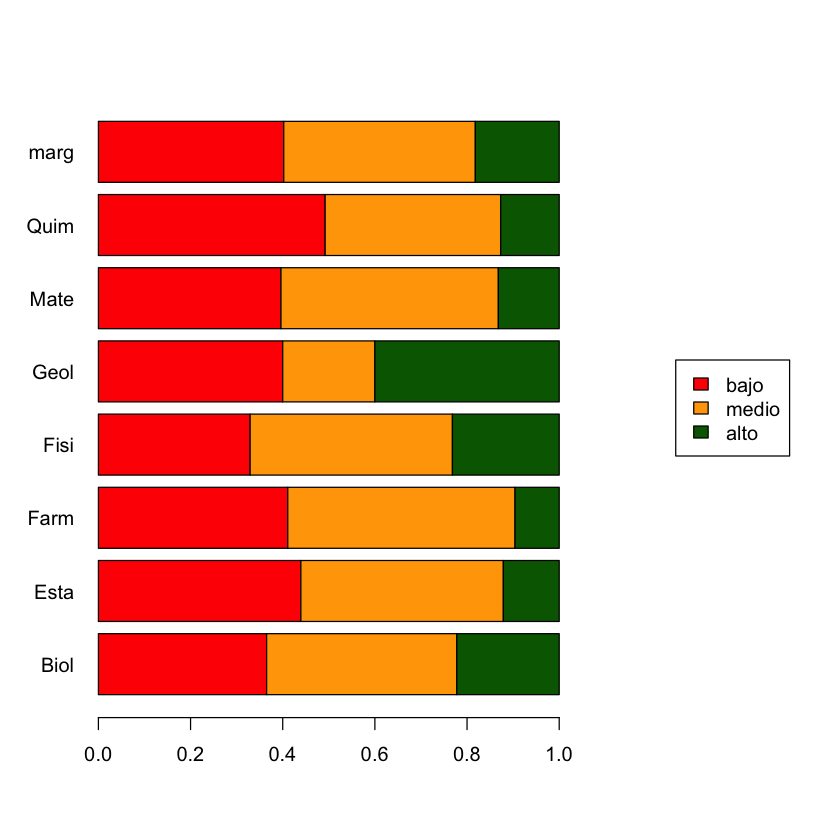

In [ ]:
Dn <- diag(rowSums(F))
round(Dn*100,1)
perFila <- solve(Dn)%*%F
rownames(perFila)<-rownames(F)
colnames(perFila)<-colnames(F)
round(perFila*100,1)
# gráfica de los perfiles
plotct(K,"row",col=c("red","orange","darkgreen")) #función de FactoClass

#### Perfiles columna

Sea $\mathbf{D}_p = diag(f_{\cdot j})$, los perfiles columna son (puestos como filas): 
$$
\mathbf{D}_p^{-1} \mathbf{F'}
$$


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim,marg
bajo,36.5,43.9,41.1,32.9,40,39.6,49.2,40.2
medio,41.3,43.9,49.3,43.9,20,47.2,38.1,41.6
alto,22.2,12.1,9.6,23.2,40,13.2,12.7,18.2


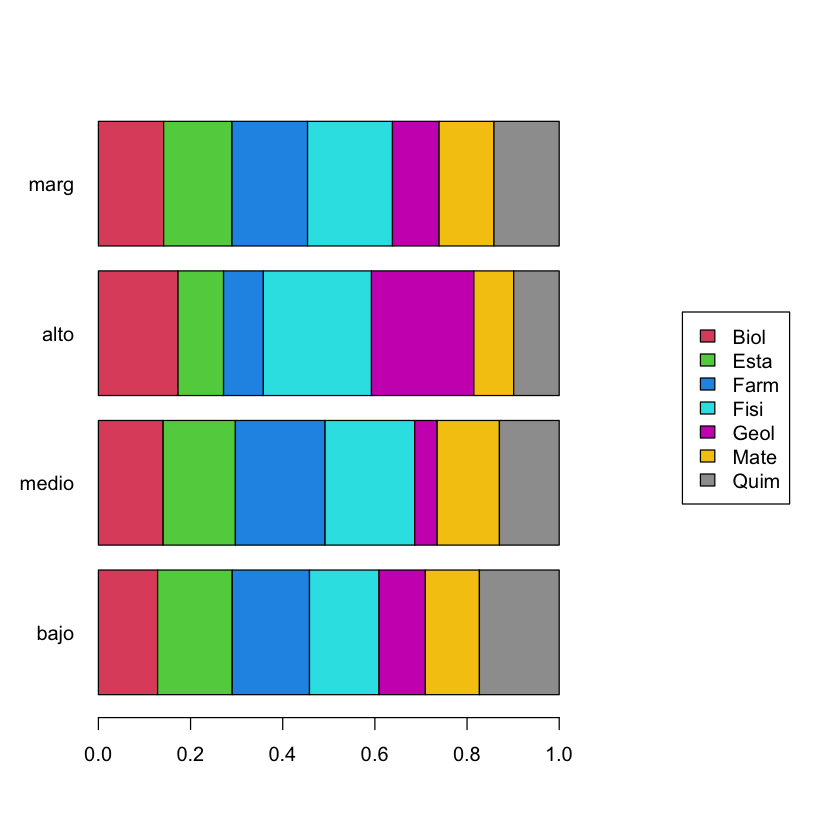

In [ ]:
plotct(t(K),"row",col=2:8,tables=TRUE)->tab #función de FactoClass
Dp<-diag(colSums(F))
tab$perC

#### El modelo de independencia
Sea $a_{ij}=f_{i\cdot}f_{\cdot j}$, término general de la tabla de
independencia $\mathbf{A}$ 


In [ ]:
A<-diag(Dn)%*%t(diag(Dp))
colnames(A)<-colnames(F)
round(cbind(F,A,F-A)*100,2)

,bajo,medio,alto,bajo,medio,alto,bajo,medio,alto
Biol,5.17,5.84,3.15,5.69,5.89,2.58,-0.53,-0.04,0.57
Esta,6.52,6.52,1.80,5.97,6.17,2.70,0.55,0.35,-0.90
Farm,6.74,8.09,1.57,6.60,6.82,2.99,0.14,1.27,-1.41
Fisi,6.07,8.09,4.27,7.41,7.66,3.35,-1.34,0.43,0.92
Geol,4.04,2.02,4.04,4.07,4.20,1.84,-0.02,-2.18,2.20
Mate,4.72,5.62,1.57,4.79,4.95,2.17,-0.07,0.67,-0.59
Quim,6.97,5.39,1.80,5.69,5.89,2.58,1.27,-0.49,-0.78


# El ACS como dos ACP



## ACP de los perfiles-fila
$$
ACP(\mathbf{X,M,N}) = ACP(\mathbf{D}_n^{-1}\mathbf{F},\mathbf{D}^{-1}_p,\mathbf{D_n})
$$
- tabla  de perfiles fila
- perfil fila $i$ = histograma $i$  = un punto en $\mathbb{R}^p$
- La diferencia entre dos histogramas = distancia entre los puntos en $\mathbb{R}^p$
- Los pesos de los puntos fila: $f_{i\cdot}$ están en la  la matriz diagonal $\mathbf{D_n}$
- producto punto dado por la matriz $\mathbf{D}^{-1}_p$
- La matriz $\mathbf{D}_n^{-1}\mathbf{F}$ no está centrada
- El mayor valor propio de la matriz a diagonalizar $\mathbf{F'D_n^{-1}FD_p^{-1}}$ es 1 y el vector propio asociado es el centro de gravedad de la nube
- Partir del segundo vector propio de esta matriz es equivalente a centrar y así se logra una simplificación de las formulas del ACS.


<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Diplomado/master/Temas/M%C3%B3dulo%203-%20Introducci%C3%B3n%20al%20aprendizaje%20de%20m%C3%A1quinas/2.%20Aprendizaje%20no%20Supervisado/Imagenes/metodosFactoriales.png" alt="Primera imagen" width="600" height="700">
<center>

### Nube de perfiles fila 

- Coordenadas de los perfiles fila son: $\mathbf{x}_i; i=1,2,\cdots,n$; con:
$$ \mathbf{x}_i(j) = \dfrac{f_{ij}}{f_{i\cdot}}; \ j=1,2,\cdots,p$$
    - $i=3$ = Farmacia con coordenadas $\mathbf{x}_3 =[ 0.411,0.493, 0.096]'$
- Centro de gravedad:
$$ \mathbf{g}_p = \sum_{i=1}^n f_{i\cdot} \mathbf{x}_i$$
    - La coordenada $j$, notada $ \mathbf{g}_p(j)$, del centro de gravedad es:
$$ 
\mathbf{g}_p(j)=\sum_{i=1}^n f_{i\cdot} \dfrac{f_{ij}}{f_{i\cdot}} = \sum_{i=1}^n f_{ij} = f_{\cdot j}
$$
    - centro de gravedad = marginal columna de la tabla \mv{F}, en el ejemplo es $ \mathbf{g}_p =[0.402, 0.416,  0.182]'$
- Distancia entre perfiles fila = distancia $ji$ cuadrado o de Benzècri:
la métrica es $\mathbf{D}^{-1}_p$, elemento diagonal  $\dfrac{1}{f_{\cdot j}}$
$$  
d^2(i,l)=\sum_{j=1}^p \dfrac{1}{f_{\cdot j}} (x_{ij}-x_{lj})^2 =
\sum_{j=1}^p \dfrac{1}{f_{\cdot j}} \left(\dfrac{f_{ij}}{f_{i\cdot}}-\dfrac{f_{lj}}{f_{l\cdot}}\right)^2
$$

    -  amplifica más las diferencias al cuadrado entre coordenadas cuando se deben a columnas de baja frecuencia marginal. 
    - La distancia $ji$ cuadrado le confiere al ACS dos propiedades: 
        + la equivalencia distribucional y 
        + las relaciones cuasi-baricéntricas,

- Inercia de la nube de perfiles fila:
$$
Inercia(N_n) = \sum_{i=1}^n f_{i\cdot } d^2(i,\mathbf{g}_p)=
\sum_{i=1}^n f_{i\cdot } \sum_{j=1}^p \dfrac{1}{f_{\cdot j}} \left(\dfrac{f_{ij}}{f_{i\cdot}}-f_{\cdot j}\right)^2=
\sum_{i=1}^n \sum_{j=1}^p  \frac{\left(f_{ij} - f_{i\cdot}f_{\cdot j}\right)^2}{f_{i\cdot}f_{\cdot j}}
$$



###  Ejes y subespacios vectoriales


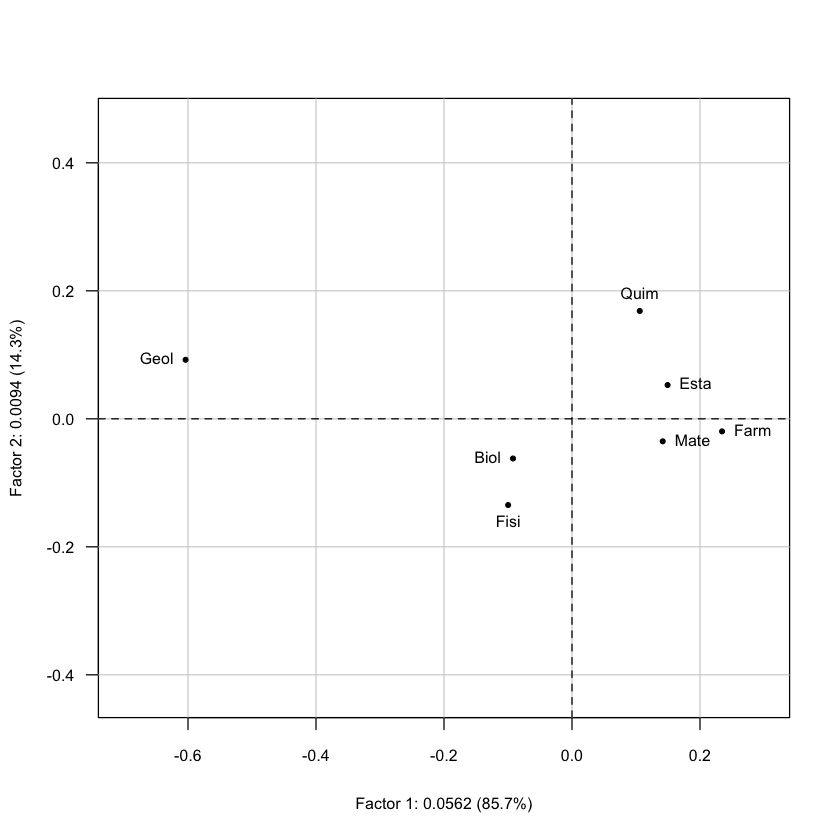

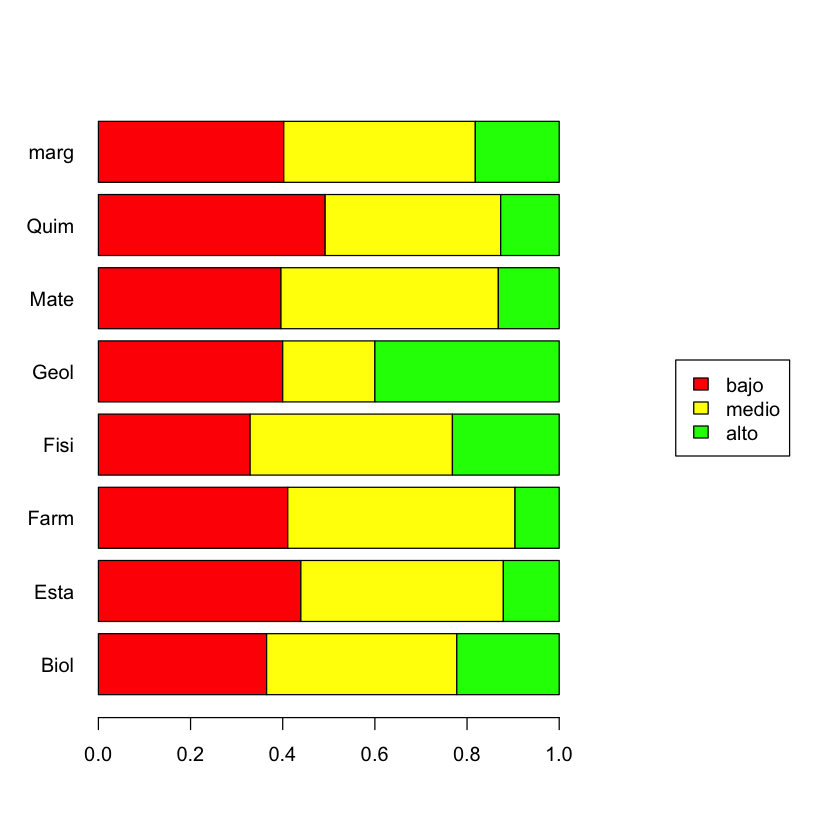

In [ ]:
acs<-dudi.coa(K,scannf=FALSE) 
plot(acs,Tcol=FALSE,xlim=c(-0.7,0.3),cframe=1,asp=1) 
plotct(K,"row",col=c("red","yellow","green"))


## ACP de los perfiles-columna
 $$ACP(\mathbf{D}_p^{-1}\mathbf{F'},\mathbf{D}_n^{-1},\mathbf{D}_p)$$
 
- Los histogramas de las distribuciones condicionales columna se
representan como puntos en $\mathbb{R}^n$
-  a cada punto $j$ se le asigna el peso $f_{\cdot j}$
-  Este análisis es simétrico al de perfiles fila  

### Primer plano factorial de los perfiles de estratos según carreras :


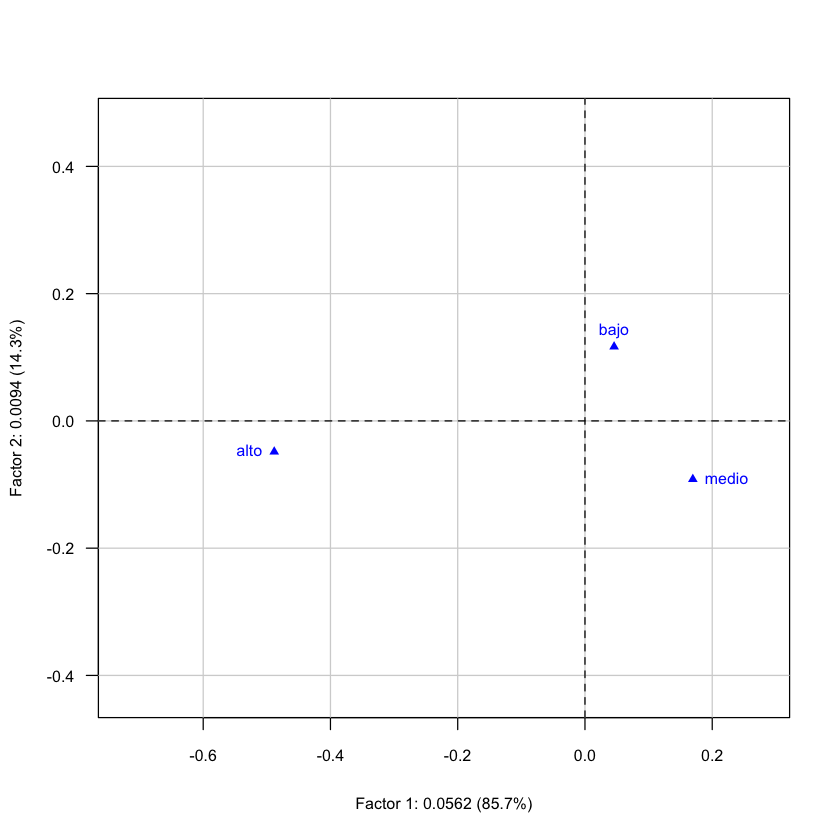

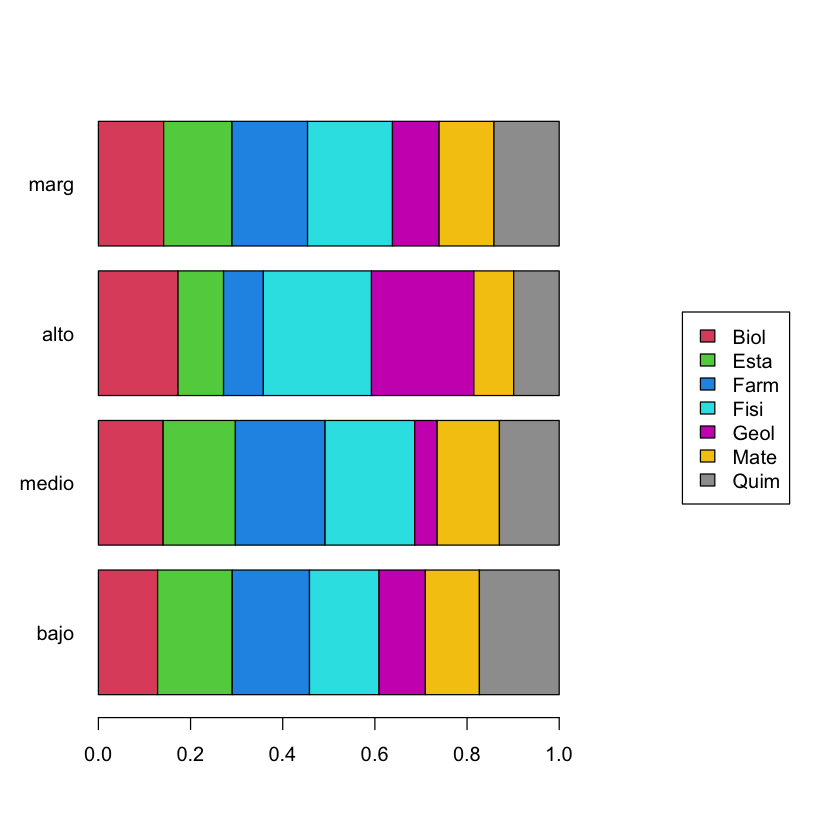

In [ ]:
plot(acs,Trow=FALSE,asp=1) 
plotct(t(K),"row",col=2:8)

# El ACS como un ACP(X,M,N)

- El ACS de la tabla $\mathbf{F}$ también se obtiene mediante el ACP de
la tabla $\mathbf{X}$ 
- usando
 $\mathbf{N}=\mathbf{D}_n=diag(f_{i\cdot})$, como pesos de las filas
y matriz de métrica en el espacio de las columnas, y
- $\mathbf{M}=\mathbf{D}_p=diag(f_{\cdot j})$, como pesos de las
columnas y matriz de métrica en el espacio de las filas.
- 
$$
x_{ij} =\frac{f_{ij} -f_{i\cdot} f_{\cdot j} }{f_{i\cdot} f_{\cdot
j} }
$$


## Equivalencia distribucional
- El ACS no se modifica si
se unen dos puntos que tienen el mismo perfil. 
- El peso del punto colapsado es la suma de los
pesos de los puntos que se unen.
- Esto permite unir filas o columnas
con perfiles parecidos, para simplificar las tablas originales
    - por ejemplo las carreras Estadística, Matemáticas y Farmacia; o las carreras Biología y Física 
- Esta
propiedad hace que el ACS sea robusto ante la "arbitrariedad" en
la conformación de las categorías de una variable en un estudio


## Relaciones cuasibaricéntricas
$$
 F_s(i) = \frac{1}{\sqrt{\lambda_s}}\sum_{j=1}^p{\frac{f_{ij}}{f_{i\cdot}} G_s(j)}
$$ 
$$
  G_s(j) = \frac{1}{\sqrt{\lambda_s}}\sum_{i=1}^n{{\frac{f_{ij}}{f_{\cdot j}}
  F_s(i)}}
$$
- Las relaciones cuasibaricéntricas hacen
posible la representación simultánea y su
interpretación. 
-  un sumando $j$ es 
$\dfrac{f_{ij}}{f_{i\cdot}} G_s(j)$, donde $\dfrac{f_{ij}}{f_{i\cdot}}$ es la coordenada $j$ del perfil de la fila $i$, es decir la altura de la barra $j$ del histograma
- como $\sum\limits_{j=1}^p \frac{f_{ij}}{f_{i\cdot}}=1$, la sumatoria de es un promedio ponderado de las coordenadas de las columnas;
- cada fila tiene un promedio diferente porque las ponderaciones cambian.
- el punto promedio se ubica dentro del polígono que une a los puntos columna, por las dilataciones $\dfrac{1}{\sqrt{\lambda_s}}; s=1,2$, el punto puede ubicarse afuera.

### Ejemplo

 Coordenada del perfil de Geología sobre el primer eje (-0.604): 

-  perfil de Geología [0.4 0.2 0.4] 
-  coordenadas de los estratos sobre el primer eje  [0.0458 0.1695 -0.4884] 
-  primer valor propio = 0.0562  
-
$$ \dfrac{1}{\sqrt{0.0562}} * (0.4*0.0458 + 0.2*0.1695 - 0.4*0.4884)=
4.2182 * (0.0118 + 0.0339 - 0.1954) = $$ $$4.2182 * (-0.1497) = -0.6315
$$ 
- El promedio ponderado por el perfil de Geología es -0.1497, se aleja del centro debido  a la la dilatación por 4.2182
- a coordenada de estrato alto es la que más suma, por:  la ponderación (0.4) y es la que está más alejada del origen (-0.4884)


In [ ]:
round(1/sqrt(acs$eig[1])*sum(c(0.4,0.2,0.4)*acs$co[,1]),3)


[1] -0.604

 ### Representación simultánea 
 
 

[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
 [6] "col.contrib" "col.abs"     "col.rel"     "col.cum"     "nf"         
[11] "call"

,Axis1,Axis2
,<dbl>,<dbl>
Biol,-0.09215791,-0.06197976
Esta,0.14936448,0.05275646
Farm,0.23447448,-0.01963184
Fisi,-0.09978904,-0.13472097
Geol,-0.60372701,0.09223675
Mate,0.14174810,-0.03518145
Quim,0.10585751,0.16852389


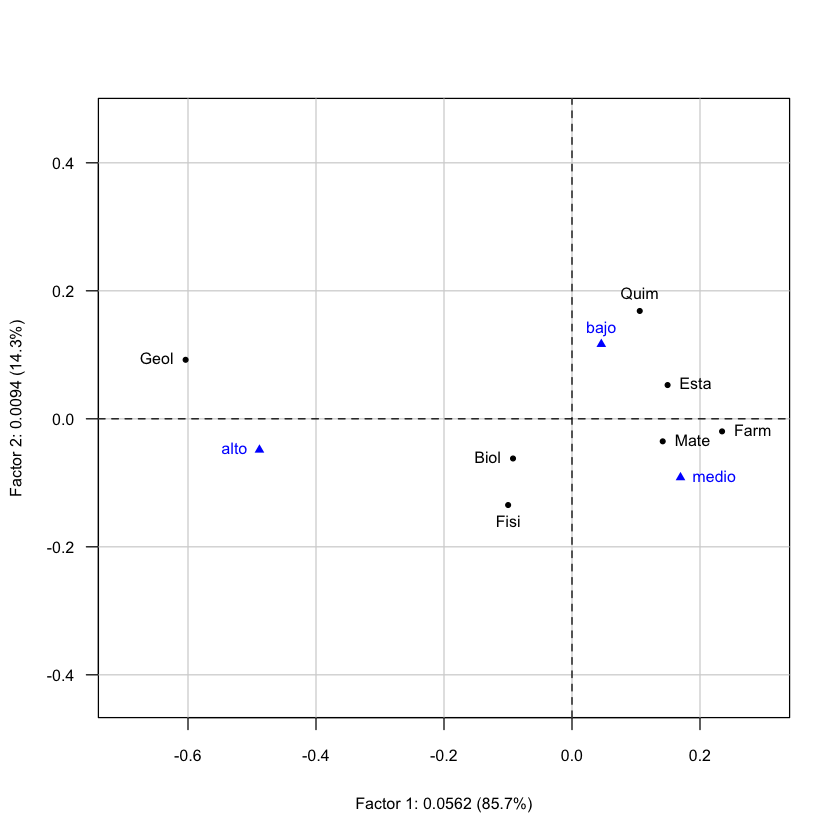

In [ ]:
plot(acs,xlim=c(-0.7,0.3),cframe=1)


In [ ]:
ayuacs<-inertia(acs,T,T)
names(ayuacs)
# carreras
round(cbind(acs$li,Ca=ayuacs$row.abs,cos2=ayuacs$row.rel,conInercia=ayuacs$row.contrib),2)
# estratos
round(cbind(acs$co,Ca=ayuacs$col.abs,cos2=ayuacs$col.rel,conInercia=ayuacs$col.contrib),2)


[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
 [6] "col.contrib" "col.abs"     "col.rel"     "col.cum"     "nf"         
[11] "call"

,Axis1,Axis2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biol,-0.09,-0.06,2.14,5.79,-68.86,-31.14,2.66
Esta,0.15,0.05,5.89,4.39,88.91,11.09,5.67
Farm,0.23,-0.02,16.05,0.67,99.30,-0.70,13.85
Fisi,-0.10,-0.13,3.26,35.61,-35.43,-64.57,7.90
Geol,-0.60,0.09,65.58,9.16,-97.72,2.28,57.50
Mate,0.14,-0.04,4.26,1.57,94.20,-5.80,3.87
Quim,0.11,0.17,2.82,42.81,28.29,71.71,8.55


,Comp1,Comp2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bajo,0.05,0.12,1.50,58.27,13.35,86.65,9.63
medio,0.17,-0.09,21.26,37.17,77.39,-22.61,23.54
alto,-0.49,-0.05,77.24,4.56,-99.02,-0.98,66.83


## Ayudas para la interpretación

- Contribución absoluta: 
$$Ca_s(i) = \dfrac{f_{i\cdot}(F_s(i))^2}{\lambda_s}$$
- Coseno cuadrado, calidad de la representación o contribución relativa:
$$Cos^2_s(i) = \dfrac{(F_s(i))^2}{d^2(i,\mathbf{g})}$$
- ¿Por qué contribución relativa?
$$Cos^2_s(i) = \dfrac{F_s^2(i)}{d^2(i,\mathbf{g})} =  \dfrac{f_{i\cdot} F_s^2(i)} {f_{i\cdot} d^2(i,\mathbf{g})}$$
    -  contribuciones del punto  a la inercia:  proyectada sobre el eje $s$ / en el espacio completo
        - Inercia sobre el eje $s$: $\sum\limits_{i=1}^n f_{i\cdot} F^2_s(i)$
        - Inercia en $\mathbb{R}^p$:  $\sum\limits_{i=1}^n f_{i\cdot} d^2(i,\mathbf{g})$


## Filas y columnas suplementarias

- Se proyectan e interpretan utilizando las fórmulas de transición.
- Su interpretación debe hacerse después de la de los elementos activos.
- AYUDAS
    -  Distancia al origen
    -  Coseno cuadrado
    -  Valor test


# Ejemplo de aplicación

Ver el ejemplo del capítulo 5 del libro Estadística descriptiva multivariada y los talleres.

Ejercicio: realizar un análisis de correspondencias simples de una tabla de su interés.